Ref: Spline cannot be less than 0

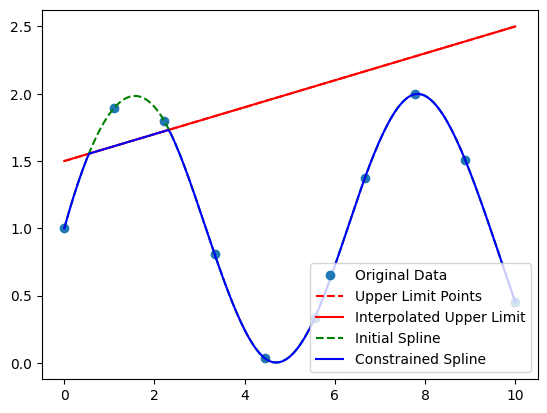

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev, interp1d

# Define your data points
x = np.linspace(0, 10, 10)
y = np.sin(x) + 1  # Example data

# Define the upper limit points
x_upper = np.linspace(0, 10, 10)
y_upper = np.linspace(1.5, 2.5, 10)  # Example upper limits

# Interpolate the upper limit points to create an upper limit function
upper_limit_func = interp1d(x_upper, y_upper, kind='linear', fill_value="extrapolate")

# Fit an initial spline
tck = splrep(x, y, s=0)

# Evaluate the initial spline
x_fine = np.linspace(x.min(), x.max(), 200)
y_spline = splev(x_fine, tck)

# Adjust the spline to ensure constraints
y_spline_adjusted = np.minimum(y_spline, upper_limit_func(x_fine))
y_spline_adjusted = np.maximum(y_spline_adjusted, 0)

# Plot the original data, upper limits, and the constrained spline
plt.plot(x, y, 'o', label='Original Data')
plt.plot(x_upper, y_upper, 'r--', label='Upper Limit Points')
plt.plot(x_fine, upper_limit_func(x_fine), 'r-', label='Interpolated Upper Limit')
plt.plot(x_fine, y_spline, 'g--', label='Initial Spline')
plt.plot(x_fine, y_spline_adjusted, 'b-', label='Constrained Spline')
plt.legend()
plt.show()
